In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from keras.datasets import cifar10
import cv2

In [22]:
#classes for "Sztuczna Inteligencja 1" = plane 0, cat 3, truck 9
#loading data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

index_train = np.where((y_train == 0) | (y_train == 3) | (y_train == 9))
index_test = np.where((y_test == 0) | (y_test == 3) | (y_test == 9))

X_train = X_train[index_train[0]]
y_train = y_train[index_train[0]]
X_test = X_test[index_test[0]]
y_test = y_test[index_test[0]]

#X_train = X_train[:15000, :].astype(float)
#y_train = np.squeeze(y_train[:15000, :])
#y_test = np.squeeze(y_test)
#X_test = X_test.astype(float)

print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))


Train image shape:    (15000, 32, 32, 3)
Train label shape:    (15000, 1)
Test image shape:     (3000, 32, 32, 3)
Test label shape:     (3000, 1)


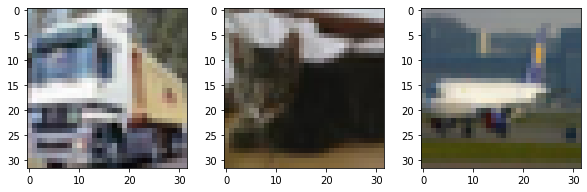

In [23]:
#visualizing data

plt.figure(figsize=(10, 10)) 

plt.subplot(3, 3, 1)
plt.imshow(X_train[0])

plt.subplot(3, 3, 2)
plt.imshow(X_train[2])

plt.subplot(3, 3, 3)
plt.imshow(X_train[30])

plt.show()

In [24]:
#converting into grayscale

X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])
print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))


Train image shape:    (15000, 32, 32)
Train label shape:    (15000, 1)
Test image shape:     (3000, 32, 32)
Test label shape:     (3000, 1)


In [25]:
#preprocessing: normalize

X_train  = X_train/255
X_test  = X_test/255
print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))


Train image shape:    (15000, 32, 32)
Train label shape:    (15000, 1)
Test image shape:     (3000, 32, 32)
Test label shape:     (3000, 1)


In [26]:
#preprocessing: reshape

X_train = np.reshape(X_train, (X_train.shape[0], -1)) 
X_test = np.reshape(X_test, (X_test.shape[0], -1)) 

print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))

Train image shape:    (15000, 1024)
Train label shape:    (15000, 1)
Test image shape:     (3000, 1024)
Test label shape:     (3000, 1)


In [27]:
#preprocessing: add bias - optional

#X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
#X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

In [28]:
print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))


Train image shape:    (15000, 1024)
Train label shape:    (15000, 1)
Test image shape:     (3000, 1024)
Test label shape:     (3000, 1)
